# Using NCrystal's builtin "MiniMC" framework for generating scatter patterns.

In this notebook we will show how NCrystal's own builtin "MiniMC" framework can be used to produce get scattering patterns from NCrystal materials in simple geometries.

This is intended as a light-weight alternative to using NCrystal in fully-fledged applications (e.g. McStas, OpenMC, or Geant4), and can be used to produce patterns of scattered neutrons, including effects of geometry and multiple scattering.

## Preamble
Install dependencies and prepare plots. Feel free to edit as you wish:

In [1]:
#By default we only do pip installs on Google Colab, but you
#can set the variable in the next line to True if you need it:
always_do_pip_installs = False
try:
    import google.colab as google_colab
except ModuleNotFoundError:
    google_colab=None#not on google colab
if always_do_pip_installs or google_colab:
    from importlib.util import find_spec as _fs
    if not _fs('NCrystal'):
        %pip -q install ncrystal ipympl numpy matplotlib
#enable inline and interactive matplotlib plots:
if google_colab:
    google_colab.output.enable_custom_widget_manager()
%matplotlib ipympl
import matplotlib
matplotlib.rcParams.update({"figure.autolayout": True})
#always import NCrystal:
import NCrystal as NC
assert NC.version_num >=  3009007, "too old NCrystal found"
NC.test() #< quick unit test that installation works

Tests completed succesfully


## Estimating multiple scattering effects with NCrystal's MiniMC
Effects of geometry and multiple scattering is normally something that appears when NCrystal is used with a suitable frontend like McStas, OpenMC, or Geant4. The frontend application keeps track of neutron trajectories and fluxes as they propagate around in a particular geometry. However, NCrystal 3.9.0 introduced a small "MiniMC" frontend, in which neutrons are propagated through a single convex volume (for now just a sphere), and recorded as they come out. For now, the only source available is a monochromatic pencil beam and the only tally available is a 4pi detector showing the exit angle w.r.t. the incoming angle.

It is intended to eventually add more options for geometrical shapes, neutron sources and detector tallies. But for now the simple available features already allows for insight into the physics of a NCrystal material model, including those due to multiple scattering and shadowing effects.

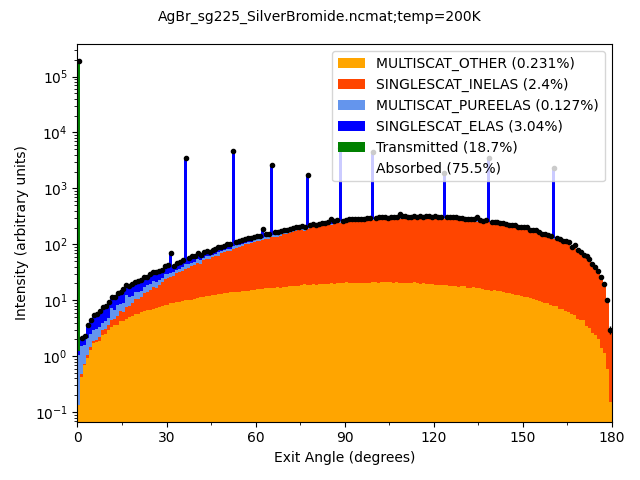

In [2]:
import NCrystal._mmc as ncmmc
pattern = ncmmc.quick_diffraction_pattern('AgBr_sg225_SilverBromide.ncmat;temp=200K',
                                           neutron_energy = '1.8Aa',
                                           material_thickness = '1cm')

pattern.plot_breakdown(rebin_factor=10,logy=True)

Note that you can get this plot same in the terminal by running:
```
nctool --mc 1.8Aa 1cm 'AgBr_sg225_SilverBromide.ncmat;temp=200K'
```
We can try a few more patterns for fun, including some single crystals:

In [3]:
def show_mmc(cfgstr,e,t,log=True):
    pattern = ncmmc.quick_diffraction_pattern( cfgstr, neutron_energy = e, material_thickness = t )
    pattern.plot_breakdown(rebin_factor=10,logy=log)

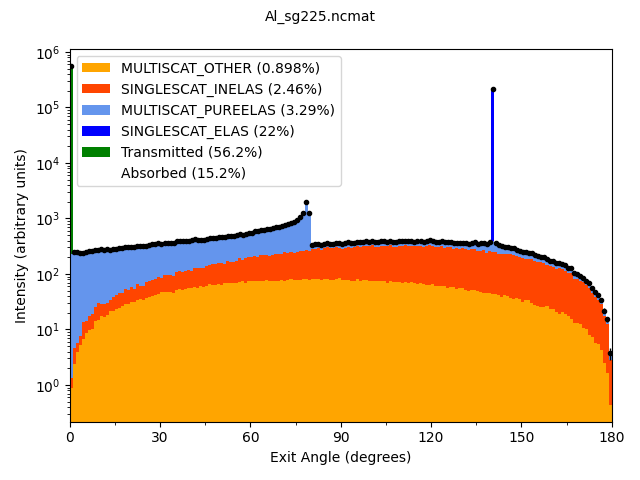

In [4]:
show_mmc('Al_sg225.ncmat','4.4Aa','5cm')#single Bragg edge here

NCrystal WARNING: Discarding 52 edges of provided kernel data due to missing S values.


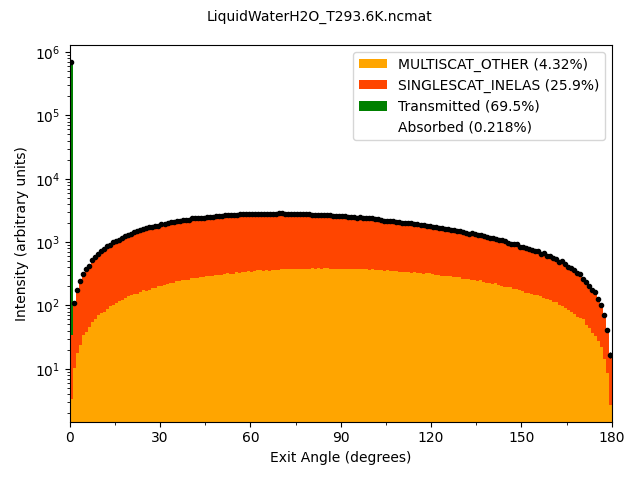

In [5]:
show_mmc('LiquidWaterH2O_T293.6K.ncmat','25meV','1mm')

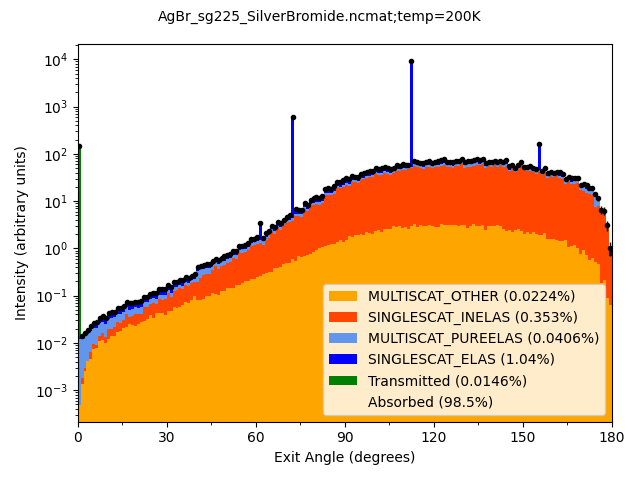

In [6]:
show_mmc('AgBr_sg225_SilverBromide.ncmat;temp=200K','3.4Aa','3cm')#absorbing, suppressing fwd transmission

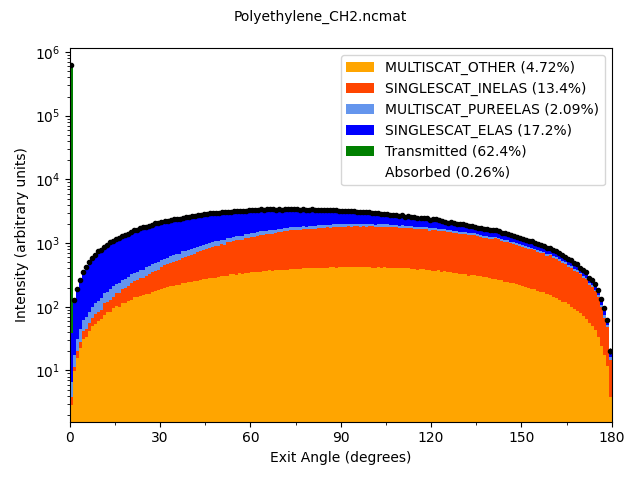

In [7]:
show_mmc('Polyethylene_CH2.ncmat','25meV','1mm')#incoherent elastic is emitted mostly forward

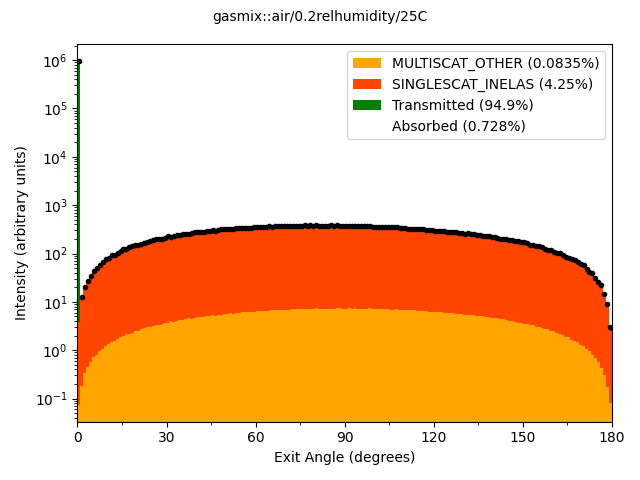

In [8]:
show_mmc('gasmix::air/0.2relhumidity/25C','25meV','1meter')

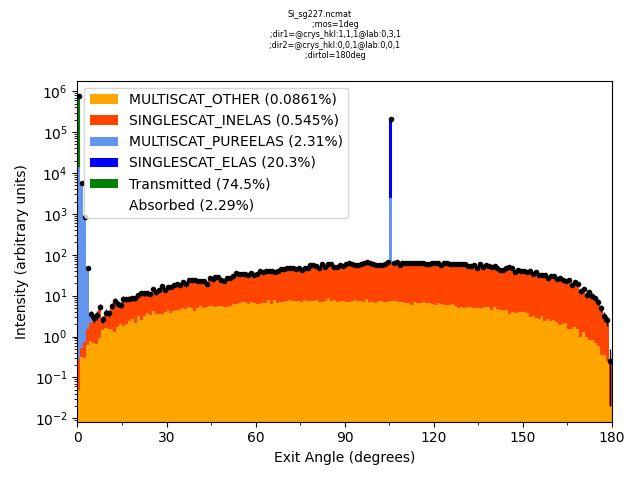

In [9]:
show_mmc('''Si_sg227.ncmat
            ;mos=1deg
            ;dir1=@crys_hkl:1,1,1@lab:0,3,1
            ;dir2=@crys_hkl:0,0,1@lab:0,0,1
            ;dirtol=180deg''','5.0Aa','1cm')#notice zig-zag walk enhances transmission and reflected peaks

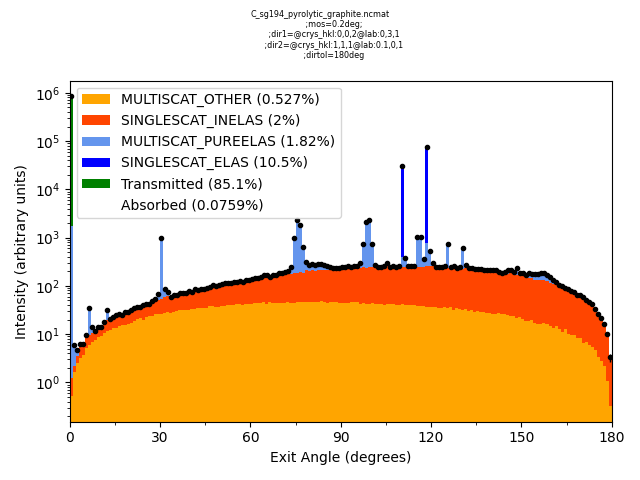

In [10]:
show_mmc('''C_sg194_pyrolytic_graphite.ncmat
           ;mos=0.2deg;
           ;dir1=@crys_hkl:0,0,2@lab:0,3,1
           ;dir2=@crys_hkl:1,1,1@lab:0.1,0,1
           ;dirtol=180deg''','3.5Aa','1cm')